## An OMOP Cohort: Patients Exposed to Amiodarone Hydrochloride > 30 Days

### Part IV: A Longitudinal Time Series Analysis

An examination of de-identified longitudinal visit and procedure data (derived to OMOP from Medicare DeSYNPuf data, 2008-2010, by OHDSI) and associated ICD9CM diagnosis codes to analyze the incidence and prevalence of AEs associated with amiodarone toxicity to the lung, thyroid and liver.

Kyle P. Rasku MS BSN RN

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
condition_visits_ds = pd.read_csv("conditions_visits_procedures.csv", parse_dates=["treatment_start", "vstart"])

In [3]:
sentinel_visits_ds = condition_visits_ds[["patient_id", "treatment_start", "treatment_period", "visit_id", "vstart", 
                                          "sentinel_condition_code", "sentinel_condition_name", "sentinel_snomed_name", 
                                          "sentinel_condition_type", "condition_start_date", "condition_end_date", 
                                          "condition_interval_days", "treatment_condition_interval_days"]].copy().reset_index()

sentinel_visits_ds["treatment_condition_interval_months"] = (sentinel_visits_ds['vstart'] - sentinel_visits_ds['treatment_start'])/np.timedelta64(1, 'M')
sentinel_visits_ds = sentinel_visits_ds[sentinel_visits_ds["condition_start_date"].notnull()]

In [4]:
condition_types = pd.get_dummies(sentinel_visits_ds["sentinel_condition_type"])
visit_codes = sentinel_visits_ds.groupby("visit_id")["sentinel_condition_code"].count().reset_index()
visit_codes.columns = ["visit_id", "condition_code_count"]

In [5]:
sentinel_visits = sentinel_visits_ds[["visit_id", "vstart", "treatment_period", "condition_interval_days", 
                                      "treatment_condition_interval_days", "treatment_condition_interval_months"]].copy()

sentinel_visits = pd.merge(sentinel_visits, visit_codes, on="visit_id", how="left").sort_values(by="vstart").set_index("vstart").fillna(0)

array([<AxesSubplot:xlabel='vstart'>, <AxesSubplot:xlabel='vstart'>,
       <AxesSubplot:xlabel='vstart'>, <AxesSubplot:xlabel='vstart'>,
       <AxesSubplot:xlabel='vstart'>], dtype=object)

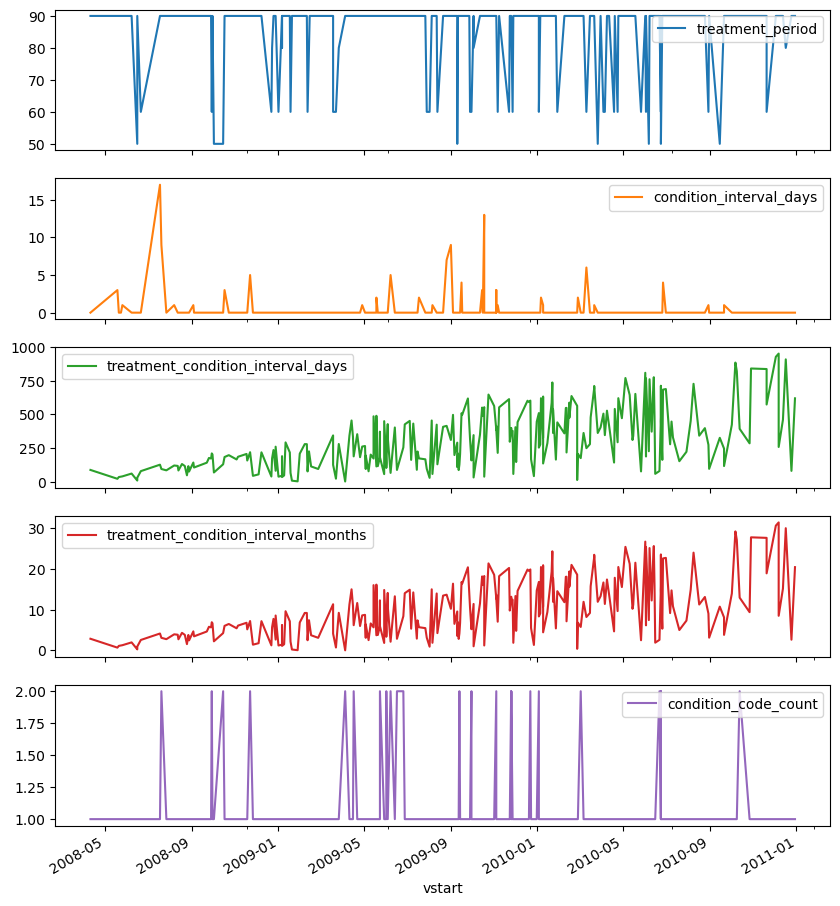

In [6]:
sentinel_visits = sentinel_visits.drop(["visit_id"], axis=1)
sentinel_visits.plot(subplots=True, figsize=(10,12))

<AxesSubplot:xlabel='vstart'>

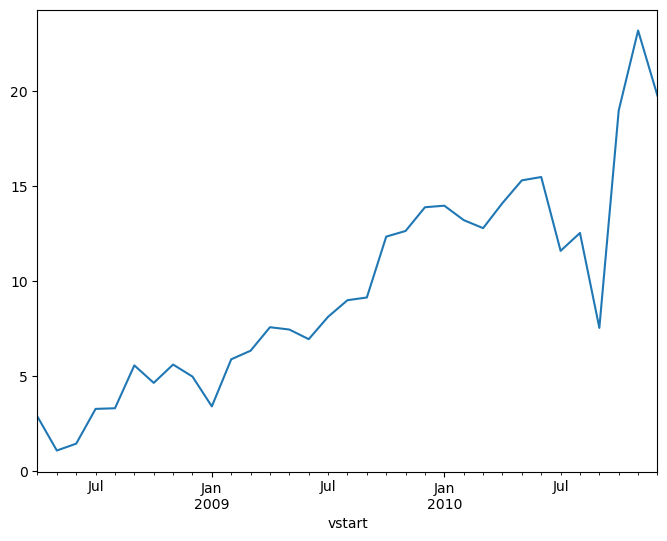

In [7]:
df = sentinel_visits["treatment_condition_interval_months"]
df_month = df.resample("M").mean()
df_month.plot(figsize=(8, 6))

<AxesSubplot:xlabel='vstart'>

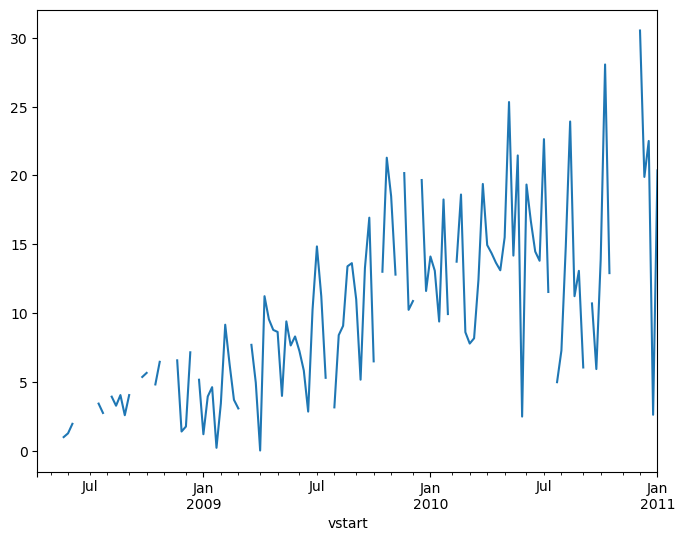

In [8]:
df_week = df.resample("W").mean()
df_week.plot(figsize=(8, 6))

While the trend is apparent at the month level, seasonality can be seen at the week level.

In [ ]:
visits_ds = pd.read_csv("amiodarone_exposed_visits.csv", parse_dates=["treatment_start", "vstart", "vend"])
procedures_ds = pd.read_csv("amiodarone_exposed_procedures.csv", parse_dates=["drug_treatment_start", "vstart", "vend"])
cpt_codes = pd.read_csv("cpt_lookup.csv")